In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 20
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 75





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/wilshire_20yr_3param.json
{   'params': {   'amounts': [-0.99, 0.7549565420773372, 0.99],
                  'qs': [   -0.7287992402379458,
                            -0.4565971889887925,
                            -0.5920884412054714]},
    'sd': 0.02326781999882704,
    'window': 334}
 1: Final value: $54359.08 (window = 334; sd = 0.023)
 2: Final value: $57620.15 (window = 339; sd = 0.023)
New best model!
{   'amounts': [-0.9730000530101742, 0.802049531427812, 0.9527891142103105],
    'qs': [-0.721748328060181, -0.4818671600436522, -0.5647548713917969]}
75: Final value: $44089.09 (window = 229; sd = 0.017)
% in now: 0.9902917628661984
Actions taken: 227
Wrote params to ../data/pct_params/wilshire_20yr_3param.json


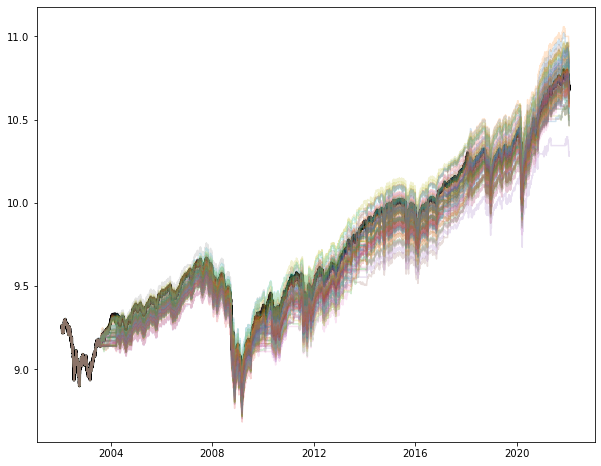

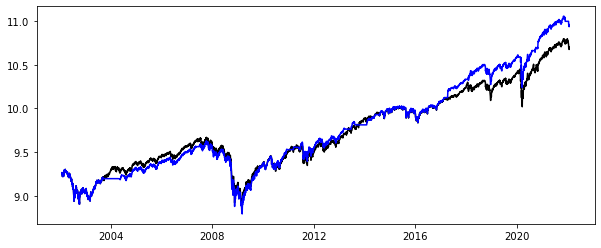

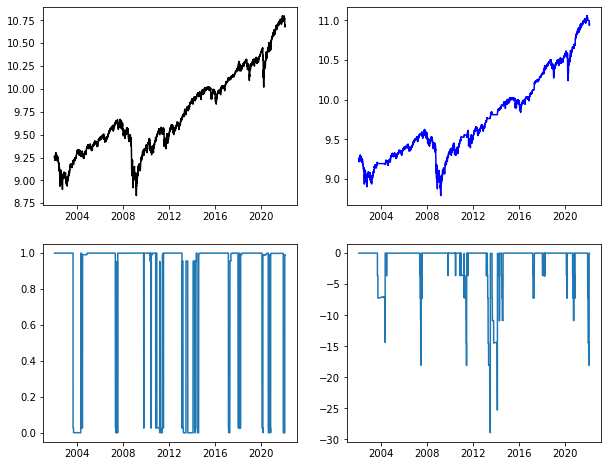



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/wilshire_20yr_2param.json
{   'params': {   'amounts': [-0.21731317131931824, 0.99],
                  'qs': [-0.7473764824073751, -0.6343742494359275]},
    'sd': 0.017271163858689088,
    'window': 113}
 1: Final value: $47150.75 (window = 113; sd = 0.017)
75: Final value: $38873.56 (window = 87; sd = 0.008))
% in now: 0.9999432559257742
Actions taken: 220
Wrote params to ../data/pct_params/wilshire_20yr_2param.json


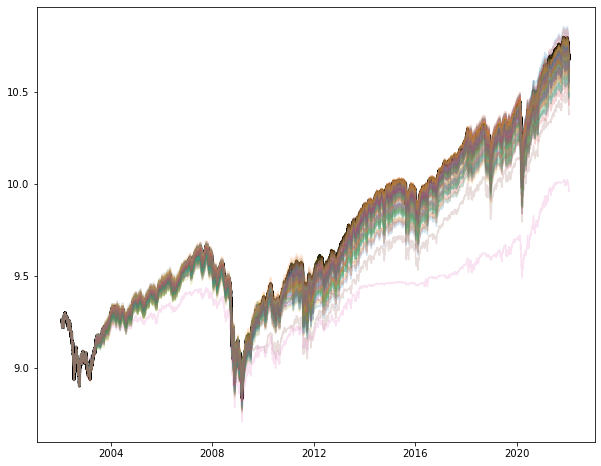

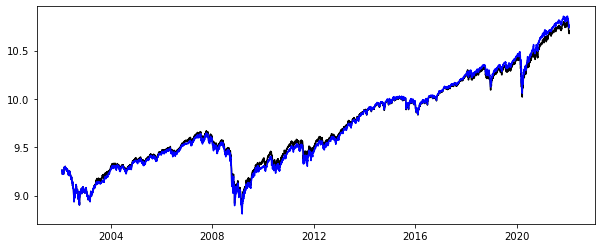

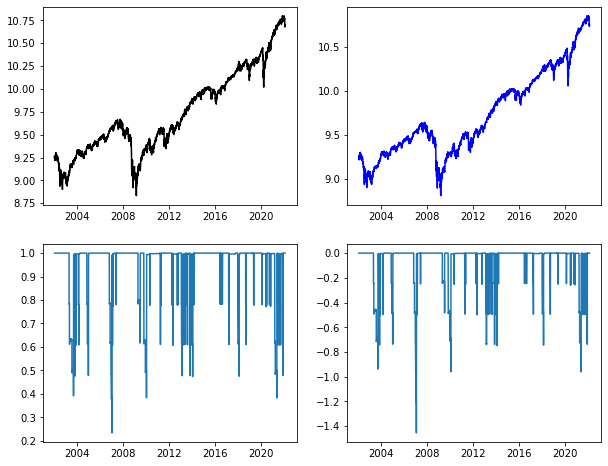



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/wilshire_20yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.5843839180475214]},
    'sd': 0.10250841524376535,
    'window': 20}
 1: Final value: $44400.43 (window = 20; sd = 0.103)
75: Final value: $44400.43 (window = 295; sd = 0.049)
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/wilshire_20yr_1param.json


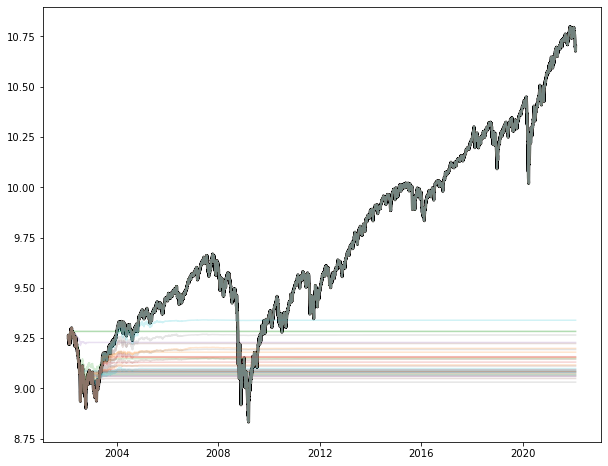

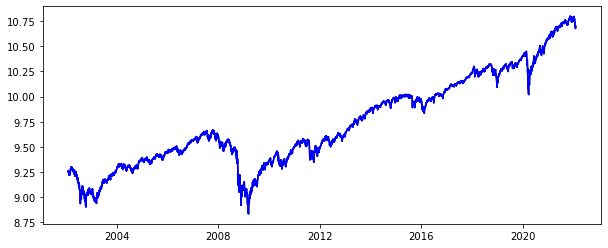

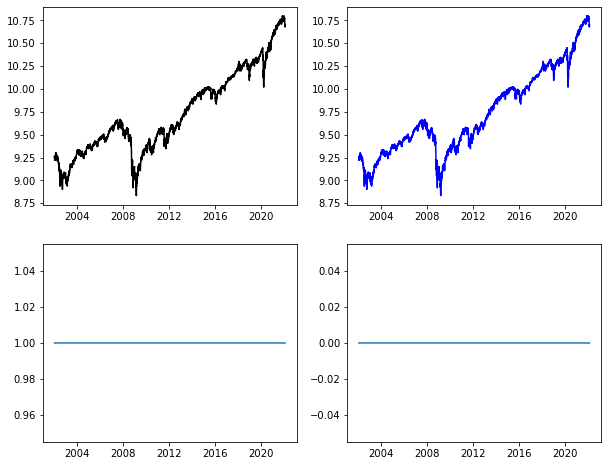




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/nasdaq_20yr_3param.json
{   'params': {   'amounts': [-0.831576859303771, 0.8642968234412084, 0.99],
                  'qs': [   0.1557394799944677,
                            0.04836662608253527,
                            0.22038773236021322]},
    'sd': 0.5118331186167797,
    'window': 70}
 1: Final value: $27437.84 (window = 70; sd = 0.512)
75: Final value: $ 5965.63 (window = 778; sd = 0.243))
% in now: 0.15963837788864152
Actions taken: 233
Wrote params to ../data/pct_params/nasdaq_20yr_3param.json


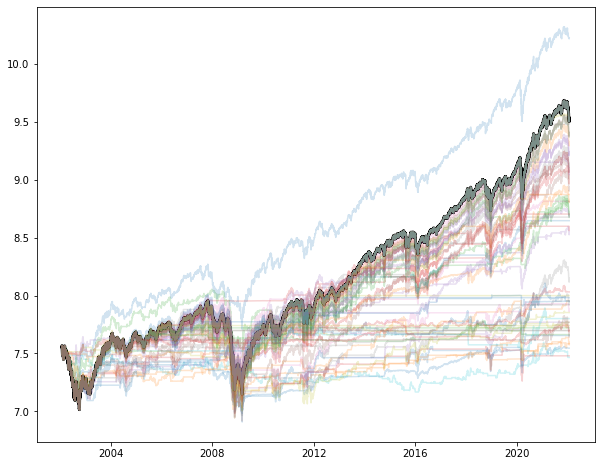

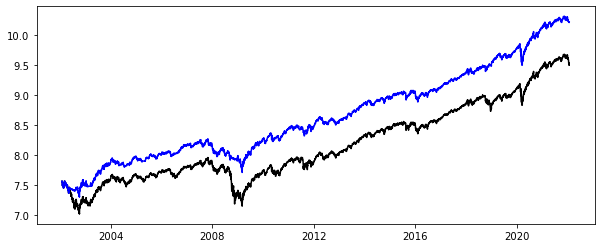

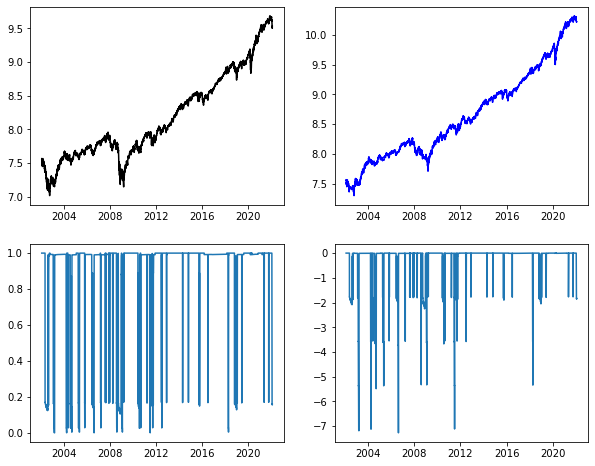



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/nasdaq_20yr_2param.json
{   'params': {   'amounts': [-0.976356870617924, 0.9654168886193454],
                  'qs': [-0.018651957320411805, -0.01]},
    'sd': 0.12283609927012139,
    'window': 230}
 1: Final value: $18842.14 (window = 230; sd = 0.123)
75: Final value: $ 2310.03 (window = 26; sd = 0.058))
% in now: 0.9998784622224474
Actions taken: 21
Wrote params to ../data/pct_params/nasdaq_20yr_2param.json


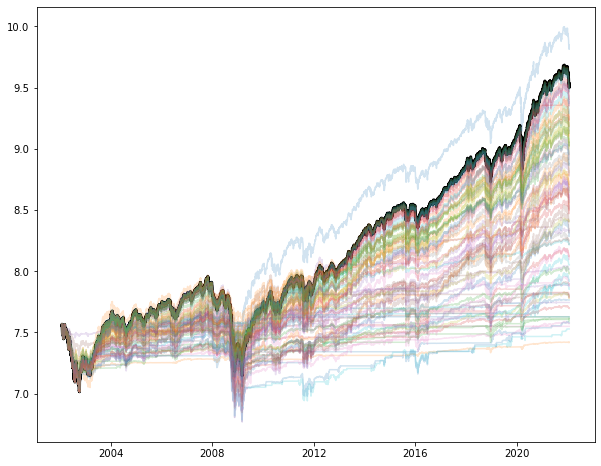

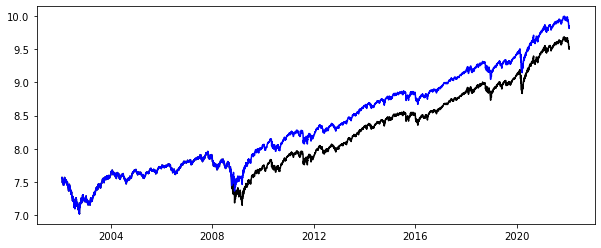

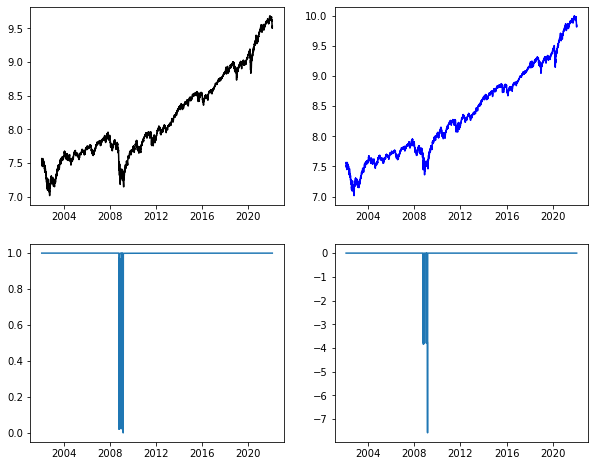



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2002-01-30
Successfully loaded params from ../data/pct_params/nasdaq_20yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.5530725938753147]},
    'sd': 0.10250841524376535,
    'window': 20}
 1: Final value: $13770.57 (window = 20; sd = 0.103)
75: Final value: $13770.57 (window = 42; sd = 0.049))
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_20yr_1param.json


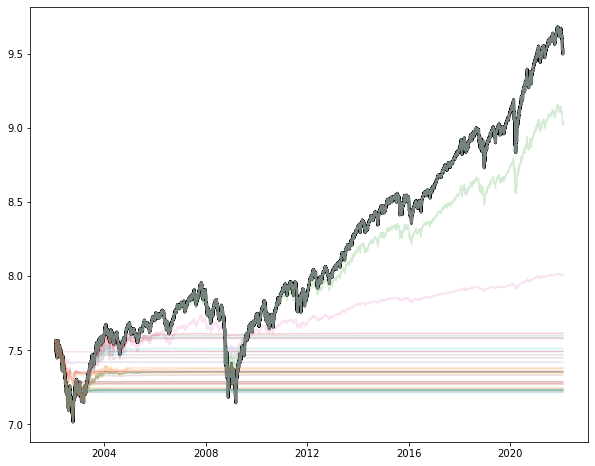

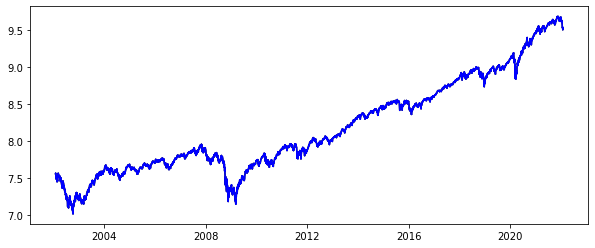

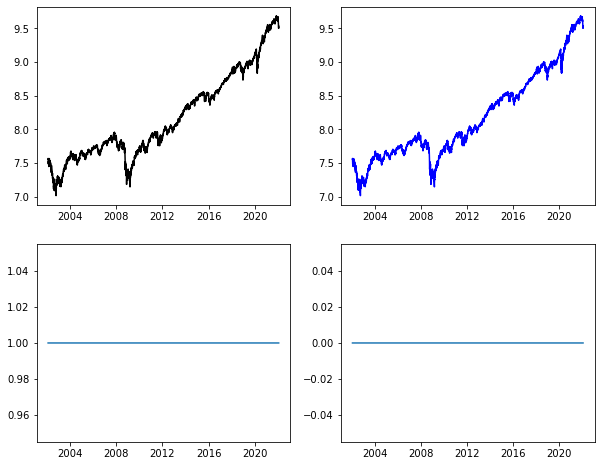

Percents in:
wilshire: [0.9903, 0.9999, 1.0]
nasdaq: [0.1596, 0.9999, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')